date : 2021-06-07 ~<br><br>

데이콘 경진대회 1등 솔루션<br>
CH01. KBO 타자 OPS 예측<br>

In [204]:
#import

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import re

In [172]:
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
    rc("font", family = font_name)
else:
    rc("font", family = "AppleGothic")
    
matplotlib.rcParams["axes.unicode_minus"]=False

# 탐색적 데이터 분석
<hr>

## 프리시즌 데이터 분석

In [173]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv("./Pre_Season_Batter.csv")

# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("./Regular_Season_Batter.csv")

In [174]:
# 프리시즌 데이터 크기
print(preseason_df.shape)

# 프리시즌 데이터 상단 출력
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [175]:
# 프리시즌 기초통계량

display(preseason_df.describe())
# 2002 ~ 2018 사이의 데이터임

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


In [176]:
# 프리시즌 info
print(preseason_df.info())

# avg가 object 타입

# null?
# SLG : 29
# OBP : 25
# starting_salary : 214
# OPS : 29
# 그 외는 not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [177]:
# 정규시즌 데이터

# 정규시즌 상단 출력
display(regular_season_df.head())

# 정규시즌 기초 통계량
display(regular_season_df.describe())
# 연도 시작이 1993년부터임

# info
print(regular_season_df.info())
# pre보다 널값이 전체적으로 많음

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

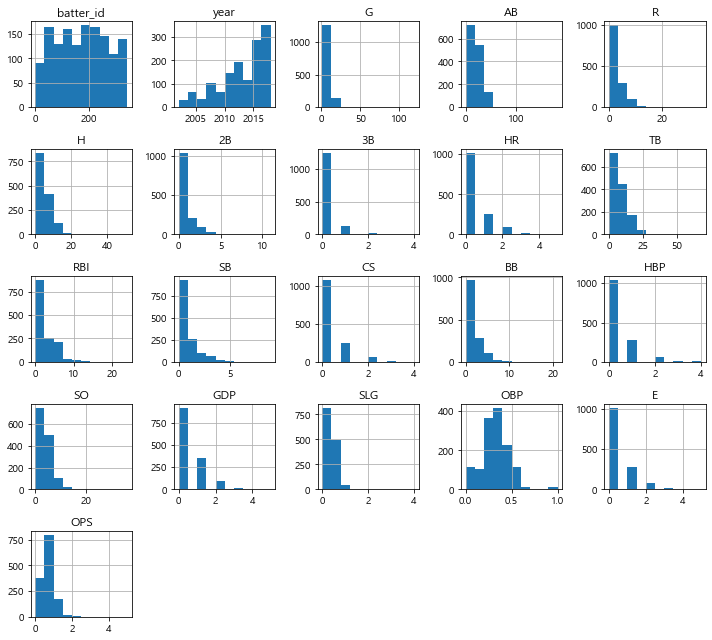

In [178]:
# 프리시즌 데이터 시각화

preseason_df.hist(figsize = (10, 9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

# 대부분의 값이 0에 가까운 낮은 값을 기록하고 있음
# 이는 프리시즌의 경기 수가 적기 때문이라고 추측할 수 있음

# 2B, 3B, HBP 등의 기록은 값의 범위가 매우 작게 형성되어있음
# 0~10 사이의 수치를 기록함

# 연도 데이터를 보면, 과거로 갈 수록 데이터 수가 적어지는 것을 확인 할 수 있음

# 전체적으로 프리시즌 데이터는 양이 부족한 상황이라고 할 수 있음

In [179]:
# 정규, 프리 선수의 수 비교

# 정규시즌 2002년 이후 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby("year")["batter_id"].count().rename("regular")
# 연도를 기준으로 선수를 묶고 카운트를 셈

# 정규시즌 연도별 기록된 선수 수
preseason_count = preseason_df.groupby("year")["batter_id"].count().rename("preseason")

pd.concat([regular_count, preseason_count, 
           np.round(preseason_count/regular_count, 2  # 값을 구하고, 소수점 둘째자리까지 자름
                   ).rename("ratio")], axis = 1 # 열기준
         ).transpose().loc[:, 2002:]

# 과거 데이터일수록 프리시즌의 기록이 정규시즌보다 적어짐

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [180]:
# 코드 분석
# 정규, 프리 성적 상관관계 비교

# 타자 이름과 연도 이용해 새로운 인덱스 생성
regular_season_df["new_idx"] = regular_season_df["batter_name"] + \
                               regular_season_df["year"].apply(str)
preseason_df["new_idx"] = preseason_df["batter_name"] + \
                          preseason_df["year"].apply(str)


# 새로운 인덱스 교집합
intersection_idx = list(set(regular_season_df["new_idx"]
                           ).intersection(preseason_df["new_idx"]))


# 교집합에만 존재하는 데이터
regular_season_new = regular_season_df.loc[
    regular_season_df["new_idx"].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = "new_idx").reset_index(drop=True)


# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df["new_idx"].apply(
    lambda x:x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by="new_idx").reset_index(drop=True)


# 검정코드
print(regular_season_new.shape, regular_season_new.shape)
sum(regular_season_new["new_idx"] == regular_season_new["new_idx"])

(1358, 30) (1358, 30)


1358

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


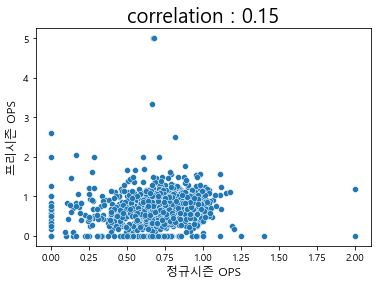

In [181]:
# 코드 분석
# 정규, 프리 성적 상관관계 계산

correlation = regular_season_new["OPS"].corr(preseason_new["OPS"])
sns.scatterplot(regular_season_new["OPS"], preseason_new["OPS"])
plt.title("correlation : "+str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel("정규시즌 OPS", fontsize = 12)
plt.ylabel("프리시즌 OPS", fontsize = 12)
plt.show()

# 플랏을 그렸을 때, 선형적인 모습을 그리고 있지 않음
# 정규와 프리의 성적이 상관성이 매우 낮기 때문임
# 프리의 경기 기록수가 매우 적으므로 구성 역시 정규와 차이가 있을 수 있음
# 따라서 프리시즌은 데이터 분석에서 제외하고 분석할것임

<hr>

## 정규시즌 데이터 분석

In [182]:
# 정규시즌 데이터

# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("./Regular_Season_Batter.csv")

# 정규시즌 상단 출력
display(regular_season_df.head())

# 정규시즌 기초 통계량
display(regular_season_df.describe())
# 연도 시작이 1993년부터임

# info
print(regular_season_df.info())
# pre보다 널값이 전체적으로 많음

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

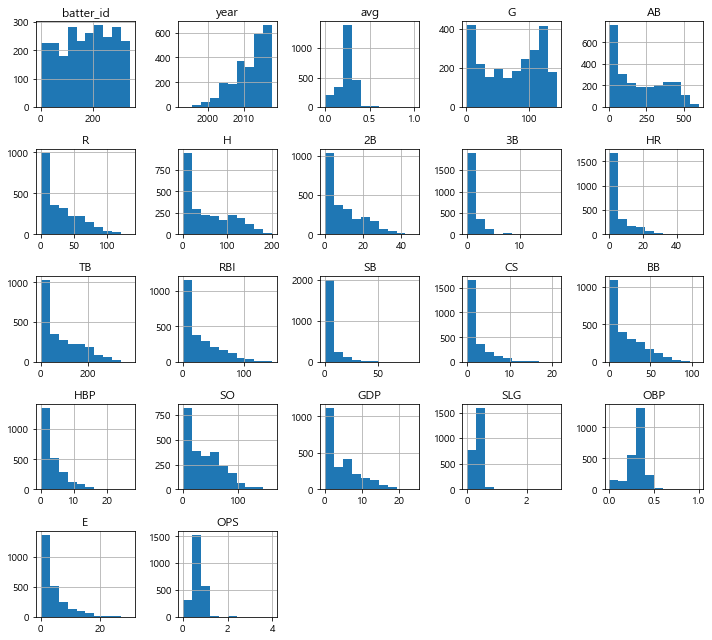

In [183]:
# 정규시즌 데이터 시각화

regular_season_df.hist(figsize = (10, 9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

# 몇몇 변수가 0에 치우쳐져 있지만, 프리시즌에 비해 값의 범위는 넓어졌음
# 예측대상인 OPS는 0~4 사이의 값을 가지고 있고, 대부분이 1이하의 값을 지녔음
# OPS는 대상이 되는 중요한 변수이므로 boxplot으로 더욱 상세히 볼 것임

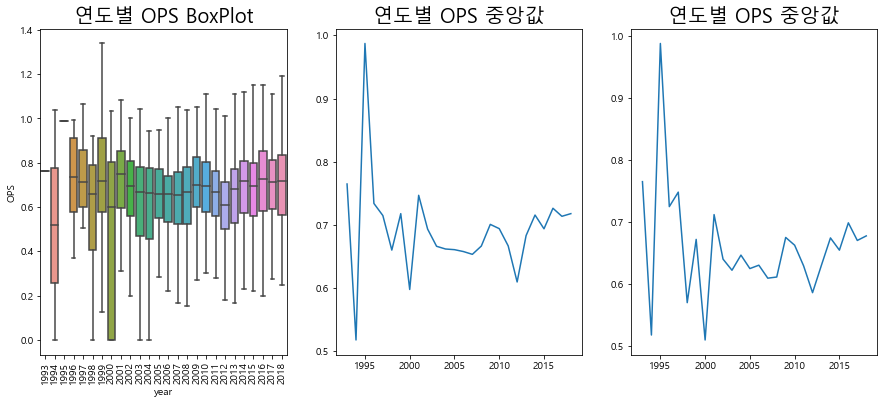

In [184]:
# OPS BoxPlot

plt.figure(figsize = (15, 6))
plt.subplot(1, 3, 1)  # 1행 2열의 첫번째(1행 1열)에 그래프를 나타내겠다는 것
g = sns.boxplot(x = "year", y = "OPS", data = regular_season_df, showfliers = False)
g.set_title("연도별 OPS BoxPlot", size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90) # 90도로 회전시켜 표시
plt.subplot(1, 3, 2) 
plt.plot(regular_season_df.groupby("year")["OPS"].median())
# 연도별로 OPS의 중앙값 계산하여 플랏을 그림
plt.title("연도별 OPS 중앙값", size = 20)
plt.subplot(1, 3, 3) 
plt.plot(regular_season_df.groupby("year")["OPS"].mean())
# 연도별로 OPS의 중앙값 계산하여 플랏을 그림
plt.title("연도별 OPS 중앙값", size = 20)
plt.show()

# 평균값이 중앙값과 조금 차이가 많이 나는 부분은 데이터가 치우쳐있을 가능성이 높음
# 2000년 이전 기록은 변동이 상당히 큼. 이후로는 상대적으로 안정되어있음

In [185]:
# 데이터 수 확인
pd.crosstab(regular_season_df["year"], "count").T
# year에 대해서 count 적용해서 보여준다는것인듯.
# T로 역으로 만들고


# 2000년대 이전 데이터는 수가 매우 적음
# 때문에 OPS 변동 폭이 컸던것

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


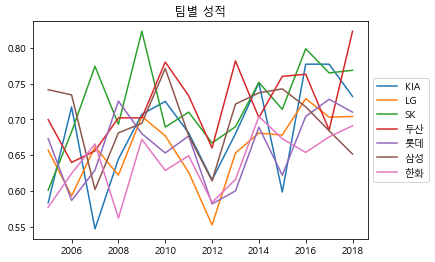

In [186]:
# 팀별 및 연도별 OPS값

# 연도별 팀의 OPS 중앙값
med_OPS_team = regular_season_df.pivot_table(index = ["team"], columns = "year", values = "OPS", aggfunc = "median")
# print(med_OPS_team)


# 2005년 이후 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis=1) <= 0
# 2005년 이후 데이터 중 결측치 값의 합이 0이하인것만 변수에 할당


# 시각화
plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns, 
           loc = "center left", bbox_to_anchor=(1, 0.5)) # legend(범례)를 그래프 바깥으로 위치시킴
plt.title("팀별 성적")
plt.show()


# 연도에 따라 팀의 성적과 순위가 변동됨

In [187]:
# 키와 몸무게를 분리

# 몸무게 분리
regular_season_df["weight"] = regular_season_df["height/weight"].apply(
    lambda x: int(re.findall("\d+", x.split("/")[1])[0]) if pd.notnull(x) else x)
# 정규식을 이용하여 regular_season_df의 height/weight에서 데이터를 가져오고 그걸 / 를 기준으로 분리
# 분리된 것 중 1번에 위치한 데이터(weight) 중 0번에 위치한 데이터를 가져오고
# 만약 가져온 데이터가 null 값이 아니면 반환하고 아니면 반환하지 않음???

# 키 분리
regular_season_df["height"] = regular_season_df["height/weight"].apply(
    lambda x: int(re.findall("\d+", x.split("/")[0])[0]) if pd.notnull(x) else x)

# 잘 분리되었는지 확인
print(regular_season_df["height/weight"][0], 
      regular_season_df["height"][0], 
      regular_season_df["weight"][0])


# 키와 몸무게에 대한 데이터 추측
# 키에 비해 몸무게가 많이 나가는 경우 : 힘이 셀 것을 예상
# 키에 비해 몸무게가 적게 나가는 경우 : 스피드가 빠를 것으로 예상

# 힘과 연관성이 높을것으로 예상되는 장타율의 상관관계
# 스피드와 연관성이 높을것으로 예상되는 출루율의 상관관계를 확인해볼 것

177cm/93kg 177.0 93.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


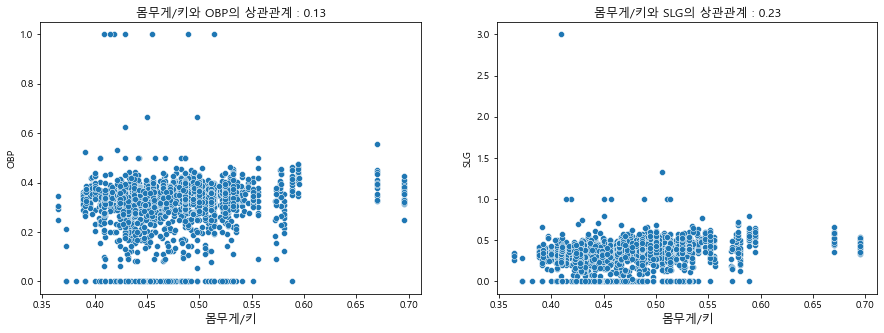

In [188]:
# 체격과 장타율(SLG), 출루율(OBP)의 상관관계

# 몸무게/키
regular_season_df["weight_per_height"] = regular_season_df["weight"] / regular_season_df["height"]


# 시각화
plt.figure(figsize=(15, 5))

# 몸무게/키와 OBP의 상관관계(corr)
plt.subplot(1, 2, 1)
correlation = regular_season_df["weight_per_height"].corr(regular_season_df["OBP"])
sns.scatterplot(regular_season_df["weight_per_height"], regular_season_df["OBP"])
plt.title(f"몸무게/키와 OBP의 상관관계 : {np.round(correlation, 2)}")
plt.xlabel("정규시즌 OBP", fontsize = 12)
plt.xlabel("몸무게/키", fontsize = 12)

# 몸무게/키와 SLG의 상관관계
plt.subplot(1, 2, 2)
correlation = regular_season_df["weight_per_height"].corr(regular_season_df["SLG"])
sns.scatterplot(regular_season_df["weight_per_height"], regular_season_df["SLG"])
plt.title(f"몸무게/키와 SLG의 상관관계 : {np.round(correlation, 2)}")
plt.xlabel("정규시즌 SLG", fontsize = 12)
plt.xlabel("몸무게/키", fontsize = 12)

plt.show()


# 상관계수만 보아도 알 수 있듯 각각의 데이터들은 예상과 다르게 매우 약한 상관관계에 있음
# 그래프를 보아도 그래프가 그 어떤 형태도 드러나지 않고 데이터가 매우 고르게 분포해있음
# 즉, 몸무게/키와 출루율, 장타율은 서로 큰 영향을 끼치지 않음을 알 수 있음

In [189]:
# position

# 포지션 별 선수의 수
print(regular_season_df["position"].value_counts())

# 포지션과 타자가 주로 이용하는 손의 데이터가 함께 들어가있음
# 데이터를 자세히 살펴보기 위해 분리할것임

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64


In [190]:
# position, 타자 손잡이(왼, 오른, 양) 분리

# 포지션
regular_season_df["pos"] = regular_season_df["position"].apply(
    lambda x: x.split("(")[0] if pd.notnull(x) else x)

# 타자 손잡이(왼, 오른, 양)
regular_season_df["hit_way"] = regular_season_df["position"].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)

# 동작 확인
print(regular_season_df["position"].head(), 
      regular_season_df["pos"].head(), regular_season_df["hit_way"].head())

0    내야수(우투우타)
1    내야수(우투좌타)
2    내야수(우투좌타)
3    내야수(우투좌타)
4    내야수(우투좌타)
Name: position, dtype: object 0    내야수
1    내야수
2    내야수
3    내야수
4    내야수
Name: pos, dtype: object 0    우타
1    좌타
2    좌타
3    좌타
4    좌타
Name: hit_way, dtype: object


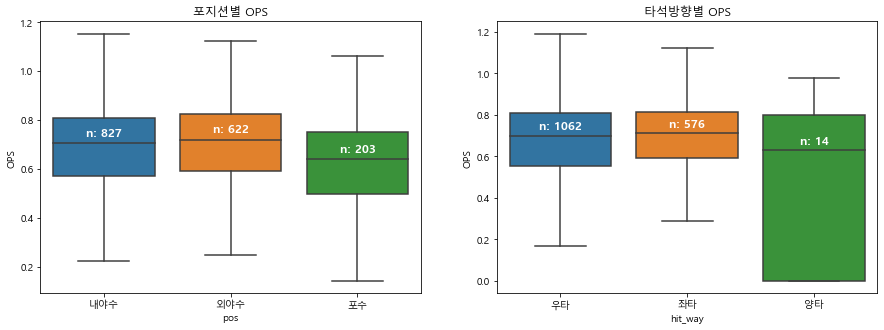

In [191]:
# 포지션별 OPS, 타석별 OPS

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)


# position 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, nobs[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')

    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()


# 포지션별 OPS
# 내야수, 외야수 큰 차이 없음
# 포수의 OPS가 다소 작음

# 타석방향별 OPS
# 우타와 좌타는 별 차이 없음
# 양타는 OPS가 다소 작음. 하지만 데이터 수가 14개라 신뢰하기는 어려움

In [192]:
# 외국인과 내국인 구분

regular_season_df['career'].head(10)

# 외국인은 가장 앞에 국적이 적혀있고, 학교가 공백으로 구분됨
# 내국인은 국적이 적혀있지 않으며 -로 학교를 구분함

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
5                         광주대성초-광주동성중-광주동성고
6                         광주대성초-광주동성중-광주동성고
7                         관산초-부천중-야탑고-NC-상무
8                         관산초-부천중-야탑고-NC-상무
9                         관산초-부천중-야탑고-NC-상무
Name: career, dtype: object

In [193]:
# 외국인 국적

# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])
# -를 공백으로 변환하고 공백으로 문자를 나눈 상태로 가장 첫번째 것을 가져옴
# 가장 첫번째 원소를 가져오는 것이므로 외국인은 국가가 내국인은 학교가 가져와짐
print(foreign_country)


# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))
# 초등학교를 의미하는 "초"가 포함되어있는 경우 내국인이기 때문에
# 해당 데이터를 제외한 나머지 데이터(외국인)를 가져옴
# 남는 데이터는 외국인의 국적 데이터 혹은 nan 값임
print(foreign_country_list)

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
# nan 값이 아닌 값들만 다시 담음
print(foreign_country_list)

0          쿠바
1       광주대성초
2       광주대성초
3       광주대성초
4       광주대성초
        ...  
2449      석천초
2450      석천초
2451      석천초
2452      석천초
2453      석천초
Name: career, Length: 2454, dtype: object
[nan, '미국', '캐나다', '쿠바', '네덜란드', '도미니카']
['미국', '캐나다', '쿠바', '네덜란드', '도미니카']


In [194]:
# 데이터프레임에 국적 추가 

# 외국인
regular_season_df['country'] = foreign_country

# 내국인
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)
                 else ('foreign' if x in foreign_country_list else 'korean'))

# 데이터 확인
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


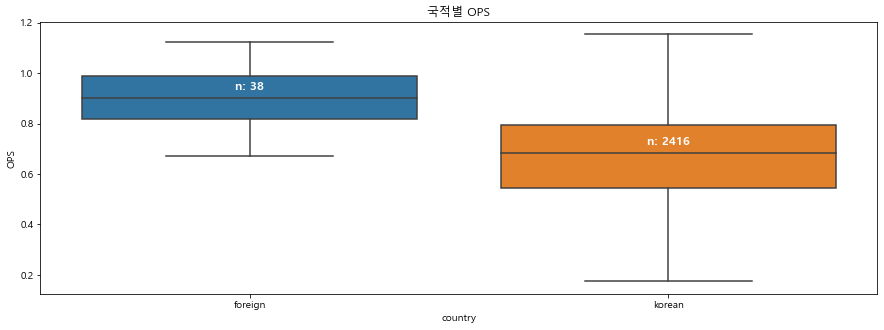

In [195]:
# 외국인 내국인 성적 비교

plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 

ax.set_title('국적별 OPS')
plt.show()


# 평균적으로 내국인 선수보다 외국인 선수가 OPS 성적이 좋은 경향을 보임
# 외국인 선수의 데이터가 많지는 않지만 명확한 차이가 존재

In [196]:
# 첫 연봉데이터 확인

regular_season_df['starting_salary'].value_counts()

# 달러와 만원을 혼용하여 단위를 표시하고 있음
# 달러는 외국인, 만원은 내국인으로 볼 수 있음

# 개인적인 의문?
# 책에서는 외국인 데이터를 앞서 보았으니 달러로 표시된 데이터를 제외하고 확인할것 이라고 하였는데
# 달러 데이터는 9개로 앞서 본 외국인 데이터(38)의 수와 차이가 많이 남
# 외국인이라고 달러만 받는게 아님을 추측할 수 있다고 생각함
# 이 경우에는 내국인 데이터만 확인하는게 아니지 않나 싶음

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
6500만원       10
33000만원      10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


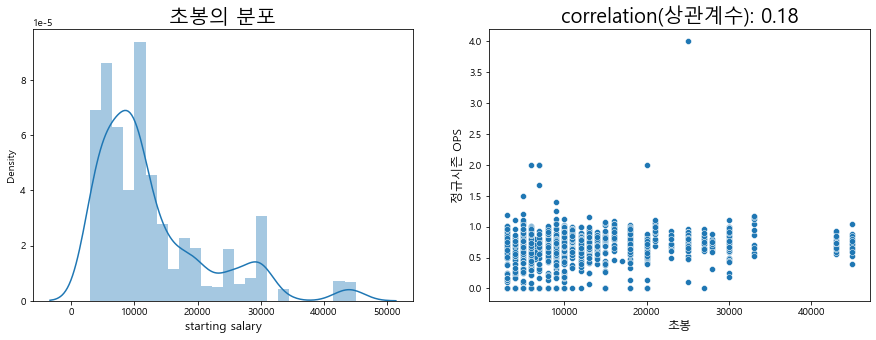

In [197]:
# 초봉과 성적 상관관계

regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x) else(
        int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))
# '만원’이 포함되어 있다면 숫자만 뽑아서 초봉에 넣음 
# 결측치라면 0으로, 만 원 단위가 아닌 초봉은 결측치로 처리

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프

b=sns.distplot(regular_season_df['starting_salary'].loc[
    regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)


# 초봉과 성적의 상관관계
plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])

b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)

plt.show()


# 초봉과 성적은 큰 상관성을 보이지 않음
# 초봉에 대한 성적은 왼쪽으로 약간 치우쳐진 정규분포 형태 유사하게 그리고 있음
# 상관계수는 0.18로 큰 상관성이 없음을 알 수 있음

### 정규시즌 데이터 탐색 결과

OPS 성적과 높은 연관성을 띠는 데이터에서의 변수가 매우 부족<br>
외국인 선수 OPS가 다소 높은 경향을 보이지만, 외국인 선수의 명단은 매해 달라지며 수도 많지 않음

데이터를 분석에 적용하기에 한계가 있음<br>
데이터를 그대로 활용하는 것이 아닌 다른 차원에서의 접근이 필요한 상황임
<hr>

## 일별 데이터 분석

In [202]:
# 일별 데이터 로드

day_by_day_df = pd.read_csv('./Regular_Season_Batter_Day_by_Day_b4.csv')

In [203]:
# 데이터 확인

display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018
